In [1]:
import os
import nltk

In [2]:
import pandas as pd

In [3]:
from tqdm import tqdm

In [4]:
from transformers import BertTokenizer
from model import BertForMultiLabelClassification
from multilabel_pipeline import MultiLabelPipeline
from pprint import pprint

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In /home/jd/anaconda3/envs/music/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jd/anaconda3/envs/music/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jd/anaconda3/envs/music/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/jd/anaconda3/envs/music/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/jd/anaconda3/envs/music

In [6]:
from scipy.io import savemat

In [7]:
tokenizer = BertTokenizer.from_pretrained("monologg/bert-base-cased-goemotions-ekman")
model = BertForMultiLabelClassification.from_pretrained("monologg/bert-base-cased-goemotions-ekman")

goemotions = MultiLabelPipeline(
    model=model,
    tokenizer=tokenizer,
    threshold=0.3
)

TypeError: Can't instantiate abstract class MultiLabelPipeline with abstract methods _forward, _sanitize_parameters, postprocess, preprocess

In [27]:
tokenizer = BertTokenizer.from_pretrained("monologg/bert-base-cased-goemotions-group")
model = BertForMultiLabelClassification.from_pretrained("monologg/bert-base-cased-goemotions-group")

In [32]:
goemotions = MultiLabelPipeline(
#     model=model,
    tokenizer=tokenizer,
#     threshold=0.3
)

TypeError: Can't instantiate abstract class MultiLabelPipeline with abstract methods _forward, _sanitize_parameters, postprocess, preprocess

In [ ]:
texts = [
    "Hey that's a thought! Maybe we need [NAME] to be the celebrity vaccine endorsement!",
    "it’s happened before?! love my hometown of beautiful new ken 😂😂",
    "I love you, brother.",
    "Troll, bro. They know they're saying stupid shit. The motherfucker does nothing but stink up libertarian subs talking shit",
]

In [ ]:
allfiles = os.listdir("../data/HP/chapters/")

# Bulk Process

In [ ]:
import multiprocessing

In [ ]:
def process(file_name):
    chapNum = file_name.split('-')[0]
    lines = open(f"../data/HP/chapters/{file_name}", "r").read().splitlines()
    
    joined_lines = "!".join(lines)
    sent_text = nltk.sent_tokenize(joined_lines) # this gives us a list of sentences
    sent_text = list(map(lambda x: x.strip("!"), sent_text))
    
    sent_text = lines
    
    sentences = []
    emotions = []

    for i, line in tqdm(enumerate(sent_text)):
        if len(line) == 0:
            continue
    #     sentence = '.'.join(sent_text[i:i+1])
        sentence = sent_text[i]
        sentences.append(sentence)

        emotion = goemotions(sentence)
    #     print(emotion)
        emotions.append(emotion[0])
    
#     print(sentences[:5], len(sentences))
    
    data = {
        'paragraph': sentences,
        'ekman': emotions
    }
    
    df = pd.DataFrame(data)
    out = df.to_csv(f"../data/HP/sheets/{chapNum}_emotion_ekman.csv")
    return out

In [ ]:
lines = open("../data/HP/chapters/16-Through_the_Trapdoor.txt", "r").read().splitlines()

In [ ]:
files = allfiles[6:8]
files

In [ ]:
pool = multiprocessing.Pool(1)
pool.map(process, files)

# Individual

In [ ]:
joined_lines = "!".join(lines)
sent_text = nltk.sent_tokenize(joined_lines) # this gives us a list of sentences
sent_text = list(map(lambda x: x.strip("!"), sent_text))

In [ ]:
sent_text = lines

In [ ]:
sentences = []
emotions = []

for i, line in tqdm(enumerate(sent_text)):
    if len(line) == 0:
        continue
#     sentence = '.'.join(sent_text[i:i+1])
    sentence = sent_text[i]
    sentences.append(sentence)
    
#     emotion = goemotions(sentence)
#     print(emotion)
#     emotions.append(emotion[0])

In [13]:
data = {
    'paragraph': sentences,
#     'ekman': emotions
}

In [14]:
df = pd.DataFrame(data)

In [15]:
df

,paragraph
0,Through the Trapdoor
1,"In years to come, Harry would never quite reme..."
2,"It was sweltering hot, especially in the large..."
3,They had practical exams as well. Professor Fl...
4,"Harry did the best he could, trying to ignore ..."
...,...
307,Hermione turned and walked straight through th...
308,Harry took a deep breath and picked up the sma...
309,"""Here I come,"" he said, and he drained the lit..."
310,It was indeed as though ice was flooding his b...


In [96]:
df.to_csv("16_emotion_ekman.csv")

# Check Percentage

In [13]:
total = len(emotions)

In [15]:
neutral = 0
for emotion in emotions:
    if len(emotion['labels']) == 1 and emotion['labels'][0] == 'neutral':
        neutral += 1

In [16]:
neutral

214

In [17]:
neutral/total * 100

68.58974358974359

# Trajectory

In [17]:
df = pd.read_csv("../GoEmotions/16_emotion_all.csv")

In [21]:
emotions = []
for i, row in df.iterrows():

    if i == 0:
        continue

    text = row['Paragraph Text']
    # print(row['Binary Emotion Class/Score'])
    binary = row['Binary Emotion Class/Score']
    ekman = row['Ekman Emotion Class']
    
    for j in range(len(text.split(' '))):
        if "positive" in binary:
            emotions.append(1.0)
        elif "negative" in binary:
            emotions.append(-1.0)
        else:
            emotions.append(0.0)

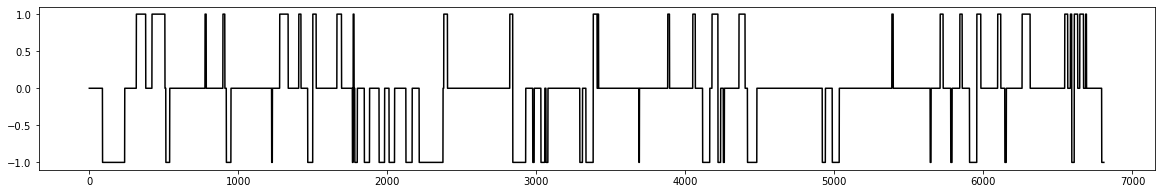

In [23]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(emotions, c='#000000')

In [24]:
mdic = {"book": emotions, "label": "emotions"}
savemat("bookemotions.mat", mdic)

In [25]:
emotions = np.array(emotions)

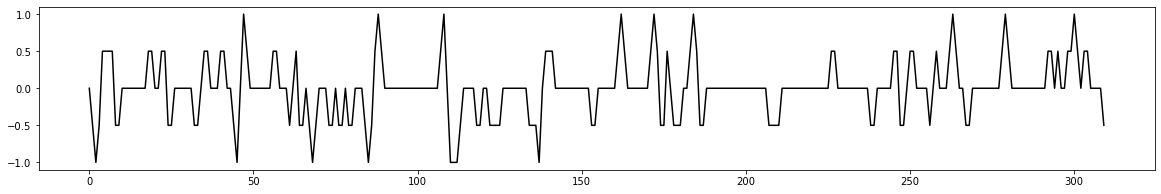

In [9]:
alpha = 0.5
emotionsnew = alpha * emotions[1:] + (1 - alpha) * emotions[:-1]
plt.plot(emotionsnew, c='#000000')

In [10]:
emotionsnew[np.logical_and(emotionsnew < 1.0, emotionsnew > 0.0)] = 0.0
emotionsnew[np.logical_and(emotionsnew > -1.0, emotionsnew < 0.0)] = 0.0

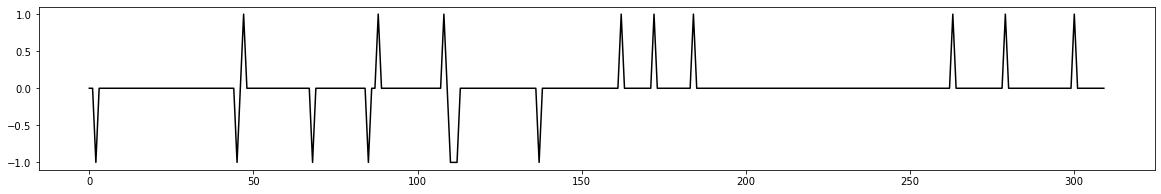

In [11]:
plt.plot(emotionsnew, c='#000000')

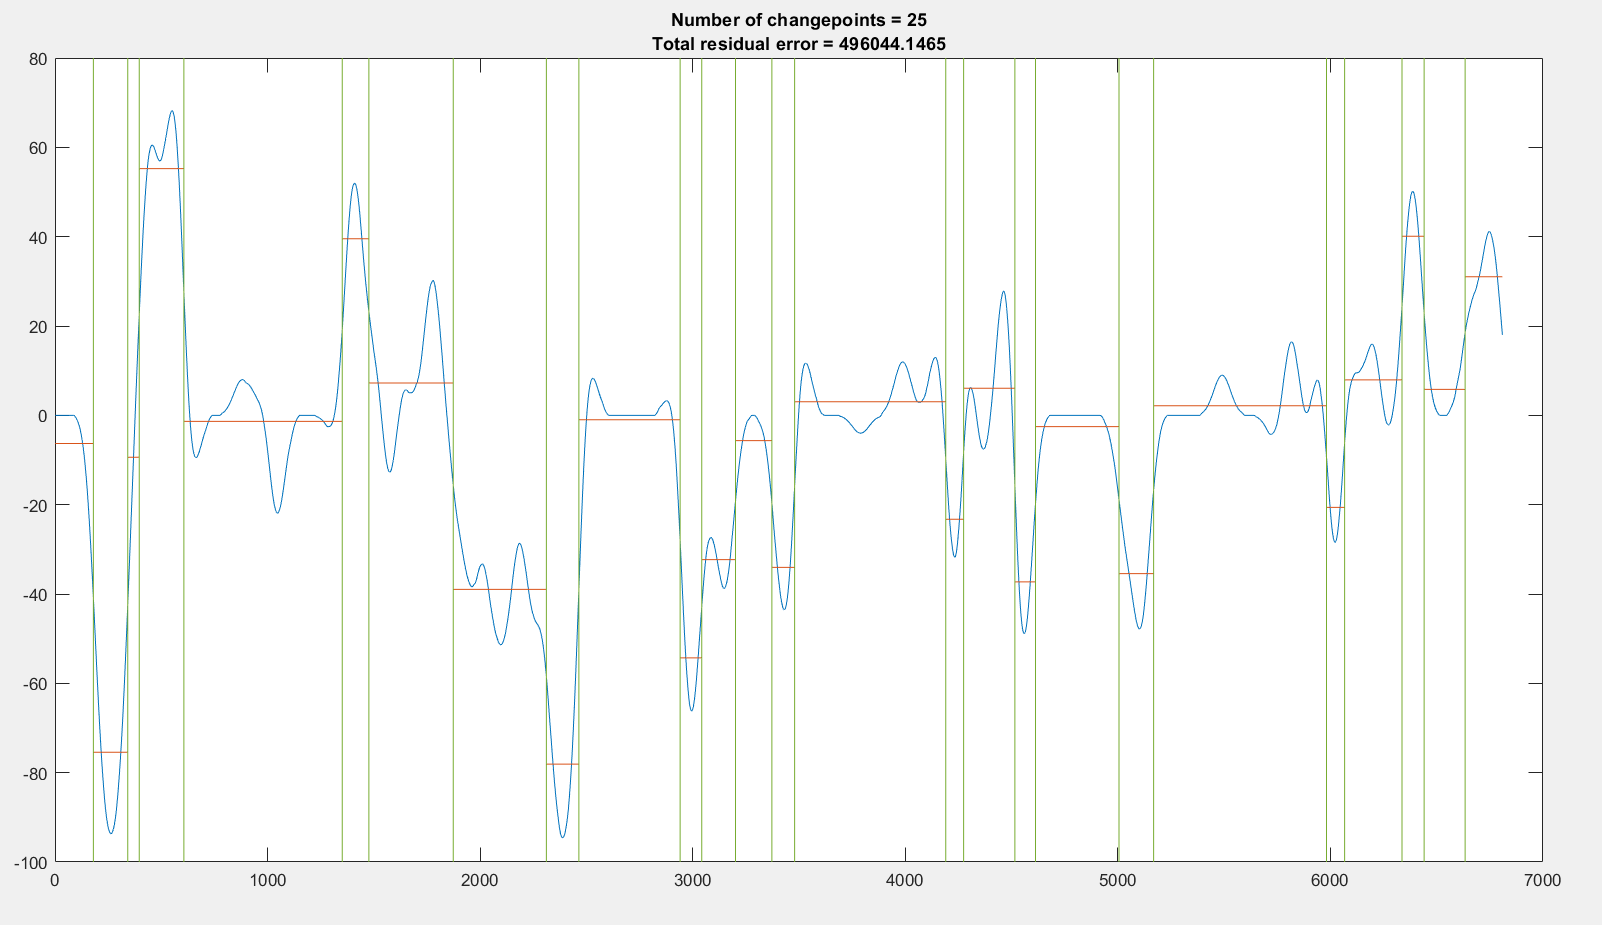

In [26]:
import scipy.io as sio

In [28]:
data = sio.loadmat(f"../MusicEmotion/changes.mat")

In [35]:
changes = data['ipt'][0]

In [39]:
changes = np.hstack([0, changes])
changes

array([   0,  138,  290,  357,  554, 1320, 1392, 1816, 2272, 2416, 2901,
       2976, 3143, 3337, 3427, 4156, 4215, 4397, 4462, 4539, 4958, 5099,
       5946, 6002, 6305, 6368])

In [43]:
emotionBlocks = []
for i in range(len(changes) - 1):
    valenceScore = np.mean(emotions[changes[i]:changes[i+1]])
    elem = (changes[i], changes[i+1], valenceScore)
    emotionBlocks.append(elem)

In [44]:
emotionBlocks

[(0, 138, -0.35507246376811596),
 (138, 290, -0.6578947368421053),
 (290, 357, 0.6119402985074627),
 (357, 554, 0.4213197969543147),
 (554, 1320, 0.03524804177545692),
 (1320, 1392, 0.20833333333333334),
 (1392, 1816, 0.04481132075471698),
 (1816, 2272, -0.4583333333333333),
 (2272, 2416, -0.5347222222222222),
 (2416, 2901, -0.08041237113402062),
 (2901, 2976, -0.37333333333333335),
 (2976, 3143, -0.2934131736526946),
 (3143, 3337, -0.1134020618556701),
 (3337, 3427, -0.15555555555555556),
 (3427, 4156, -0.0205761316872428),
 (4156, 4215, 0.4745762711864407),
 (4215, 4397, 0.08791208791208792),
 (4397, 4462, -0.6307692307692307),
 (4462, 4539, -0.23376623376623376),
 (4539, 4958, -0.050119331742243436),
 (4958, 5099, -0.3333333333333333),
 (5099, 5946, -0.010625737898465172),
 (5946, 6002, 0.30357142857142855),
 (6002, 6305, 0.1848184818481848),
 (6305, 6368, 0.14285714285714285)]

In [60]:
count = 0
paragraphEmotionPlay = []
for j, row in df.iterrows():
    if j == 0:
        continue

    text = row['Paragraph Text']
    # print(row['Binary Emotion Class/Score'])
    words = text.split(' ')
    print(len(words) + count)
    
    f = 0
    
    for i in range(len(emotionBlocks)):
        start, end, score = emotionBlocks[i]
        if start >= count:
            paragraphEmotionPlay.append(score)
            f = 1
            break
    
    if f == 0:
        paragraphEmotionPlay.append(0)
        
    count += len(words)

55
89
165
238
316
379
421
508
514
540
547
562
572
629
681
743
750
757
777
785
852
871
897
910
920
951
962
975
1018
1042
1159
1178
1224
1229
1247
1278
1335
1372
1388
1395
1406
1421
1441
1447
1466
1493
1500
1518
1523
1538
1555
1580
1588
1614
1625
1658
1662
1693
1697
1752
1758
1766
1771
1777
1782
1799
1814
1846
1859
1881
1891
1902
1942
1945
1982
1998
2012
2049
2092
2125
2167
2176
2191
2209
2214
2229
2374
2379
2389
2404
2415
2422
2435
2466
2478
2511
2593
2604
2659
2668
2699
2734
2747
2754
2761
2777
2804
2822
2831
2842
2865
2880
2912
2929
2946
2961
2966
2972
2976
2986
2991
3000
3031
3057
3065
3078
3089
3107
3162
3198
3227
3262
3275
3286
3292
3310
3333
3368
3382
3408
3413
3418
3437
3476
3499
3505
3510
3516
3544
3552
3565
3580
3634
3688
3692
3720
3728
3745
3764
3794
3841
3882
3886
3894
3913
3952
3979
3990
3998
4016
4040
4050
4059
4067
4116
4164
4179
4219
4237
4255
4262
4277
4290
4360
4382
4401
4417
4480
4487
4502
4509
4518
4528
4576
4590
4616
4662
4687
4692
4704
4713
4761
4768
4776
4790
4831


In [61]:
len(paragraphEmotionPlay)

311

In [62]:
paragraphEmotionPlay

[-0.35507246376811596,
 -0.6578947368421053,
 -0.6578947368421053,
 0.6119402985074627,
 0.6119402985074627,
 0.4213197969543147,
 0.03524804177545692,
 0.03524804177545692,
 0.03524804177545692,
 0.03524804177545692,
 0.03524804177545692,
 0.03524804177545692,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.20833333333333334,
 0.04481132075471698,
 0.04481132075471698,
 0.04481132075471698,
 -0.4583333333333333,
 -0.4583333333333333,
 -0.4583333333333333,
 -0.4583333333333333,
 -0.4583333333333333,
 -0.45833333